In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/animals10/translate.py
/kaggle/input/animals10/raw-img/cavallo/OIP-mdvOxIWAyReAoEJcMk5z4wHaJ4.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-TPYKs3XId_sMgp_6LLA6JgDMEy.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jlVRrokx7Vu1axi8OnTX2AHaE2.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-F4QVZ71QagiynDMnFNxJUAHaEK.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-UFtUZnXq0JHZo5R8UuF80wHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-irWuWeIWd3Hm3BWGd0OEsQHaGO.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Y-hB14A3coI7TEgrEew0UAHaFj.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-KqeKmYfnRwKd89nLg8_zRAHaHb.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-s40xdXSQY099gt1hLGlzAwHaFP.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-4k_sWoJ4_9-G1f0emDBVtwHaE6.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-W-uUxHx-yovp1DQNtX1qdQHaFk.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-Npxx8kemjjTljUyT9-BQgAHaFi.jpeg
/kaggle/input/animals10/raw-img/cavallo/OIP-jCu7nlv

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [10]:
base_model = InceptionV3(input_shape=(150,150,3),weights='imagenet', include_top=False)


In [24]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [25]:
from tensorflow.keras.models import Model
model = Model(inputs=base_model.input, outputs=predictions)

In [26]:
for layer in base_model.layers:
    layer.trainable = False

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    horizontal_flip=True,
    validation_split=0.1)
validation_datagen = ImageDataGenerator(rescale=1.0/255,
                                        validation_split=0.1)


# Sesuaikan direktori data pelatihan dan validasi
data_dir = '/kaggle/input/animals10/raw-img'
# Gunakan ImageDataGenerator untuk memuat dan meningkatkan data pelatihan dan validasi
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),  # Ganti dengan ukuran gambar yang sesuai
    shuffle=True,
    class_mode='categorical',
    subset='training')

validation_generator = validation_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    class_mode='categorical',
    subset='validation')

Found 23565 images belonging to 10 classes.
Found 2614 images belonging to 10 classes.


In [34]:
print("Kelas dari train_generator:")
print(train_generator.class_indices)

# Mencetak kelas dari validation_generator
print("Kelas dari validation_generator:")
print(validation_generator.class_indices)

Kelas dari train_generator:
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}
Kelas dari validation_generator:
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


In [35]:
class_names = train_generator.class_indices
print(class_names)

{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}


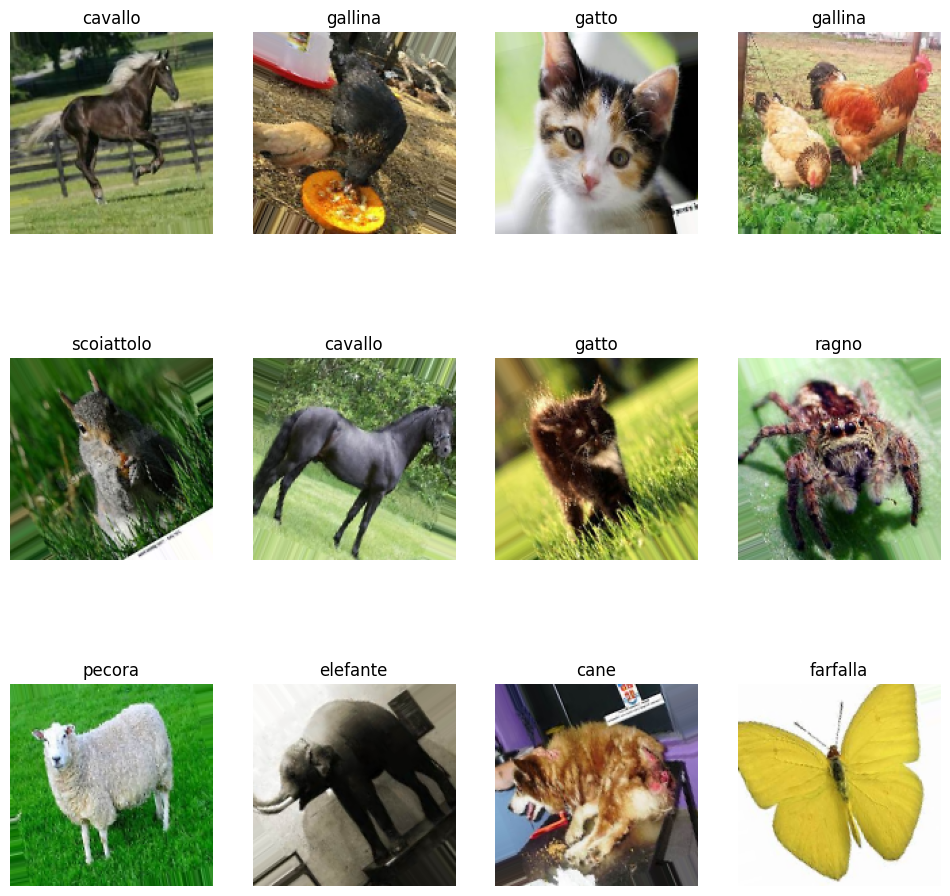

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))

# Mengambil satu batch gambar dari train_generator
images, labels = next(train_generator)
for i in range(12):  # Mengambil 12 gambar dari batch
    ax = plt.subplot(3, 4, i + 1)  # Menggunakan grid 3x4 untuk 12 gambar
    plt.imshow(images[i])
    class_index = labels[i].argmax()  # Mengambil indeks kelas dari one-hot encoding
    class_name = list(train_generator.class_indices.keys())[class_index]
    plt.title(class_name)
    plt.axis("off")

plt.show()

In [40]:
class myCallback(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
            if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.93):
                print("\n Accuracy telah mencapai 97% atau lebih, menghentikan pelatihan ")
                self.model.stop_training = True

callback = myCallback()


In [41]:
history = model.fit(
          train_generator,
          epochs=50,
          steps_per_epoch=64,
          validation_data=validation_generator, 
          validation_steps=5,  
          verbose=2,
          callbacks=[callback])

Epoch 1/50
64/64 - 17s - loss: 0.3596 - accuracy: 0.8857 - val_loss: 0.2501 - val_accuracy: 0.9062 - 17s/epoch - 270ms/step
Epoch 2/50
64/64 - 17s - loss: 0.3434 - accuracy: 0.8842 - val_loss: 0.1950 - val_accuracy: 0.9250 - 17s/epoch - 270ms/step
Epoch 3/50
64/64 - 18s - loss: 0.3798 - accuracy: 0.8774 - val_loss: 0.2886 - val_accuracy: 0.9062 - 18s/epoch - 277ms/step
Epoch 4/50
64/64 - 17s - loss: 0.3477 - accuracy: 0.8867 - val_loss: 0.1888 - val_accuracy: 0.9312 - 17s/epoch - 270ms/step
Epoch 5/50
64/64 - 17s - loss: 0.3579 - accuracy: 0.8853 - val_loss: 0.3125 - val_accuracy: 0.8938 - 17s/epoch - 262ms/step
Epoch 6/50
64/64 - 17s - loss: 0.3930 - accuracy: 0.8696 - val_loss: 0.2290 - val_accuracy: 0.9062 - 17s/epoch - 268ms/step
Epoch 7/50
64/64 - 17s - loss: 0.3587 - accuracy: 0.8853 - val_loss: 0.2816 - val_accuracy: 0.9125 - 17s/epoch - 262ms/step
Epoch 8/50
64/64 - 17s - loss: 0.3707 - accuracy: 0.8813 - val_loss: 0.2254 - val_accuracy: 0.9062 - 17s/epoch - 270ms/step
Epoch 9/